In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

## LFM-1b_users.txt

In [6]:
df_users = pd.read_csv('gs://boostcamp-1/LFM-1b/LFM-1b_users.txt', sep = '\t')
df_users.head()

,user_id,country,age,gender,playcount,registered_unixtime
0,384,UK,35,m,42139,1035849600
1,1206,NaN,-1,n,33103,1035849600
2,2622,NaN,-1,NaN,2030,1037404800
3,2732,NaN,-1,n,147,1037577600
4,3653,UK,31,m,18504,1041033600


In [7]:
df_users.describe()

,user_id,age,playcount,registered_unixtime
count,1.203220e+05,120322.000000,1.203220e+05,1.203220e+05
mean,3.187078e+07,9.105816,1.624666e+04,1.275454e+09
std,1.660875e+07,14.159072,3.448146e+04,6.191908e+07
min,3.840000e+02,-1.000000,-1.000000e+00,1.035850e+09
25%,1.570139e+07,-1.000000,6.700000e+02,1.233879e+09
50%,3.664183e+07,-1.000000,1.689000e+03,1.295976e+09
75%,4.805658e+07,21.000000,1.784725e+04,1.329481e+09
max,5.096744e+07,112.000000,1.000150e+06,1.343251e+09


In [8]:
for i in df_users.columns:
    count_nan = df_users[i].isna().sum()
    print ('Count of NaN ' + i + ': ' + str(count_nan) + ' / '+ str(df_users.shape[0]))

Count of NaN user_id: 0 / 120322
Count of NaN country: 65136 / 120322
Count of NaN age: 0 / 120322
Count of NaN gender: 212 / 120322
Count of NaN playcount: 0 / 120322
Count of NaN registered_unixtime: 0 / 120322


In [9]:
country = df_users.country.dropna()
country = country.values

[7, 9, 10, 16, 18, 23, 28, 29, 33, 36, 37, 38, 44, 45, 47, 51, 54, 56, 60, 69, 76, 78, 79, 80, 82, 85, 87, 90, 108, 110, 128, 135, 136, 140, 148, 152, 156, 157, 158, 161, 166, 183, 188, 190, 192, 196]


<AxesSubplot: >

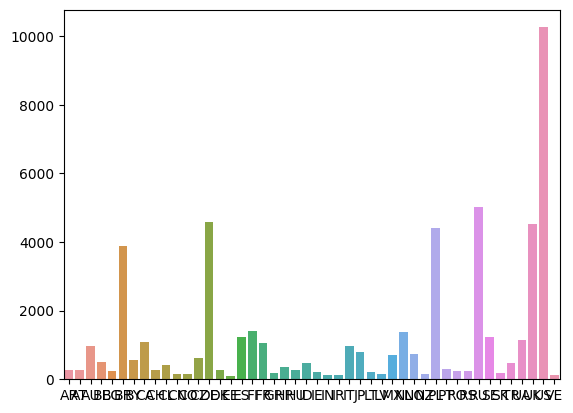

In [10]:
x, y = np.unique(country, return_counts = True)

idx = [ i for i in range(len(x)) if y[i] > 100] # 100개 이상인 국가 아니면 의미 없다고 판단.
x = [x[i] for i in idx]
y = [y[i] for i in idx]

print(idx)
sns.barplot(x = x , y = y)

- 결측치는 US로 메꾸거나 없이 사용하는게 나을 듯
- 초기 입력할 때 국가를 필수적으로 받으면 결측치 채워 학습, 아니면 국가 자체 제외하고 학습

<AxesSubplot: >

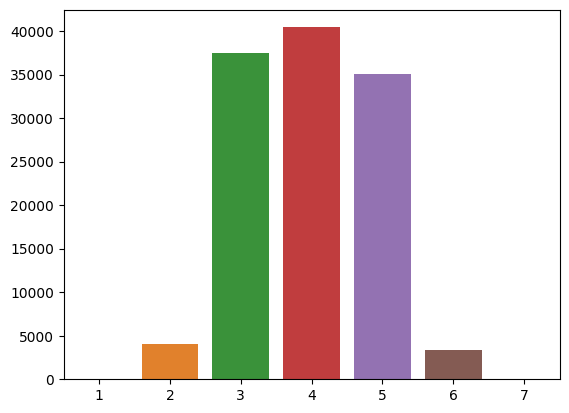

In [17]:
sr_playcount = df_users.playcount.copy().apply(lambda x : len(str(x)))
x, y = np.unique(sr_playcount, return_counts = True)
sns.barplot(x =x, y= y)

x축 : 자리수, 1이면 0~9 , 2면 10~99, ..
만 자리 대로 들은 사람들이 제일 많음.

In [36]:
df_users['age'].to_list().count(-1) / df_users.shape[0]

0.6166952012100863

나이 결측치 61%

<AxesSubplot: >

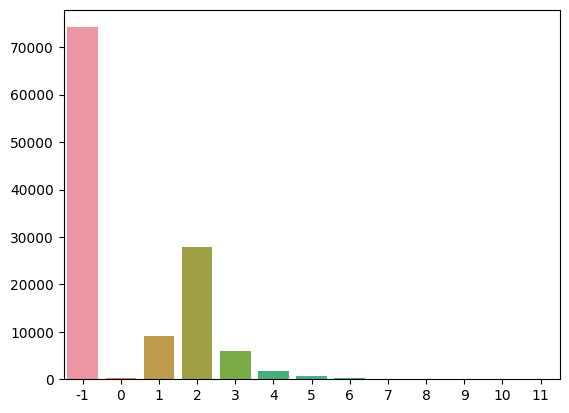

In [37]:
x, y = np.unique(df_users['age'].copy().apply(lambda x : x // 10), return_counts= True)
sns.barplot(x = x, y = y)

20대가 가장 많음
- 결측치 비율대로 random하게 채우거나
- 20대로 메우기

<AxesSubplot: >

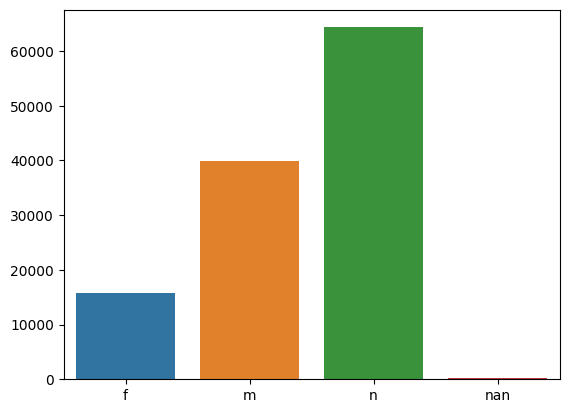

In [40]:
x, y= np.unique(df_users['gender'].copy().fillna('nan'), return_counts=True)
sns.barplot(x = x, y = y)

n은 nan이랑 동일한것으로 간주
- 마찬가지로 비율대로 채우거나
- 그대로 학습시키거나
- 없애고 학습시키기

## LFM-1b_albums.txt

In [ ]:
# df_albums_chunk = list(pd.read_csv('gs://boostcamp-1/LFM-1b/LFM-1b_albums.txt', sep = '\t', chunksize =  10000, names = ['LE_album', 'album_name', 'album_id']))
# for df in df_albums_chunk:
#     display(df.head(2))

In [69]:
df_albums = pd.read_csv('gs://boostcamp-1/LFM-1b/LFM-1b_albums.txt', sep = '\t', nrows =  100000, names = ['album-id', 'album-name', 'artist-id'])
df_albums.head()

,album-id,album-name,artist-id
0,1,Wasting Light,3
1,2,Rust In Peace,1
2,3,Spiral Circus Live,4
3,4,Tha Carter 3,2
4,5,Schoolyard Ghosts,5


album_id 가 들어오고 해당 앨범 id를 라벨 encoding 한 le_album 와 매칭시킨다

In [70]:
df_artists = pd.read_csv('gs://boostcamp-1/LFM-1b/LFM-1b_artists.txt', sep = '\t', nrows =  100000, names = ['artist-id', 'artist-name'])
df_artists.head()

,artist-id,artist-name
0,1,Megadeth
1,2,Lil Wayne
2,3,Foo Fighters
3,4,Porcupine Tree
4,5,No-Man


In [71]:
df_artists.head()
df_artists.dtypes

artist-id       int64
artist-name    object
dtype: object

In [75]:
df_artists['artist-name'].loc[np.where(df_artists['artist-name'].astype('str').copy().apply(len) > 50)[0]]

786      Delfín hasta el Fin, La Tigresa del Oriente y ...
840      Miles Davis, Bill Evans, Marcus Miller & Mike ...
1473     Giuseppe Ottaviani with Audio Cells featuring ...
1564     Paul Oakenfold & Matt Goss Pres. The Concrete ...
2164     ANNA TSUCHIYA inspi'NANA(BLACK STONES),OLIVIA ...
                               ...                        
99356    Berliner Philharmoniker [Orchestra] / Herbert ...
99568    Depeche Mode - Peace (2009) [FLAC] (CD Bong + ...
99683    F.M. Einheit ,  Jamie Lidell ,  David Link ,  ...
99856    Czech Philharmonic Chamber Orchestra & Kuehn's...
99956    :W:umpscut - Ich will dich (I want you (CDM) (...
Name: artist-name, Length: 1126, dtype: object

artist 이름 이상한거 많음..

In [76]:
df_tracks = pd.read_csv('gs://boostcamp-1/LFM-1b/LFM-1b_tracks.txt', sep = '\t', nrows =  100000, names = ['track-id',' track-name', 'artist-id'])
df_tracks.head()

,track-id,track-name,artist-id
0,1,A Matter of Time,3
1,2,Hangar 18,1
2,3,Up the Downstair,4
3,4,Mr. Carter (Featuring Jay-Z),2
4,5,Mixtaped,5


track_num 가 들어오고 해당 track id를 라벨 encoding 한 le_track 와 매칭시킨다

In [77]:
df_LEs = pd.read_csv('gs://boostcamp-1/LFM-1b/LFM-1b_LEs.txt', sep = '\t', nrows =  100000, names = ['user-id', 'artist-id', 'album-id', 'track-id', 'timestamp'])
df_LEs.head()

,user-id,artist-id,album-id,track-id,timestamp
0,31435741,2,4,4,1385212958
1,31435741,2,4,4,1385212642
2,31435741,2,4,4,1385212325
3,31435741,2,4,4,1385209508
4,31435741,2,4,4,1385209191


In [80]:
tracks = dict()
for i in np.unique(df_LEs['album-id']):
    tracks[i] = np.unique(df_LEs[df_LEs['album-id'] == i]['track-id'])

In [81]:
tracks

{1: array([   1,  410,  631,  758, 1738, 2849, 2850]),
 2: array([   2,    8, 2379, 2403, 2404, 2405, 2406, 2407, 2416, 3566, 6960]),
 3: array([   3,  161,  305,  458, 1255, 2139]),
 4: array([  4, 837]),
 5: array([  5, 224, 558]),
 6: array([   6,  371,  572,  573, 1634, 1714, 4933]),
 7: array([   7, 2486]),
 8: array([   9,   12, 1618, 3508, 3932, 4774, 5805, 5806, 6888, 6902]),
 9: array([10]),
 10: array([  11,  360,  511,  521, 1380]),
 11: array([ 13, 844]),
 12: array([14]),
 13: array([  15,  372,  648, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340,
        1341]),
 14: array([  16,  945,  950, 1896, 1905, 2417, 3764]),
 15: array([17]),
 16: array([  18,  166,  267, 3688]),
 17: array([19]),
 18: array([  20,  851, 9135, 9422, 9423, 9424, 9425, 9426, 9427, 9428, 9429,
        9430]),
 19: array([ 21,  22,  25,  26,  27,  30,  31,  32,  33,  34, 107, 113]),
 20: array([  23,  165,  209,  749, 1485]),
 21: array([   24,    44,   151,   361,   376,   420,   427,   575,  1160,

- 한 사람이 노래 여러번 들을 때 로그가 계속 쌓임.
- data 가공 할 때 groupby count를 통해 data 크기 줄이기